In [2]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer
from sklearn import decomposition
from umap import UMAP
from sklearn.metrics import silhouette_score
from scipy.linalg import eigh
from sklearn import metrics
import plotly.express as px
import plotly.graph_objects as go
from IPython.core.interactiveshell import InteractiveShell



Importing our dataset and converting it to a dataframe

In [3]:
data = load_breast_cancer(as_frame=True)
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
df = pd.DataFrame(np.c_[data['data'], data['target']], columns= np.append(data['feature_names'], ['target']))

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [5]:
df.shape

(569, 31)

Standardising our data

In [7]:
data = df[0:569]
data = np.asarray(data)
data.shape

(569, 31)

In [8]:
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

Using the Elbow method to find the best number of clusters to use. 
Step 1. create function where we check the inertia for a range of clusters (1-10)
Step 2. plot our results and chose our number of clusters

In [9]:
no_clusters = []
K = range(1,10)
for k in K:
    kmean = KMeans(n_clusters=k)
    kmean.fit(scaled_data)
    no_clusters.append(kmean.inertia_)

In [10]:
fig = px.line(x=K, y=no_clusters)
fig.show()

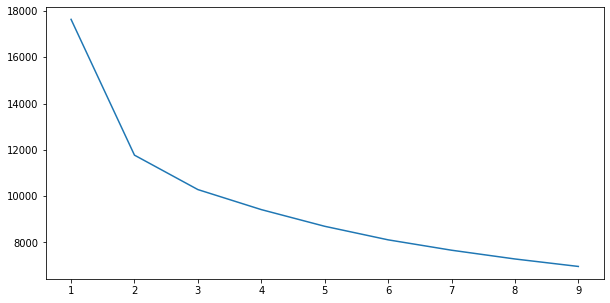

In [29]:
plt.figure(figsize=(10,5))
plt.plot(K, no_clusters)
plt.show()

Plotting the data with and without KMeans

In [11]:
model = KMeans(n_clusters=3)
model.fit(scaled_data)
labels = model.predict(scaled_data)

Text(0.5, 1.0, 'With KMeans')

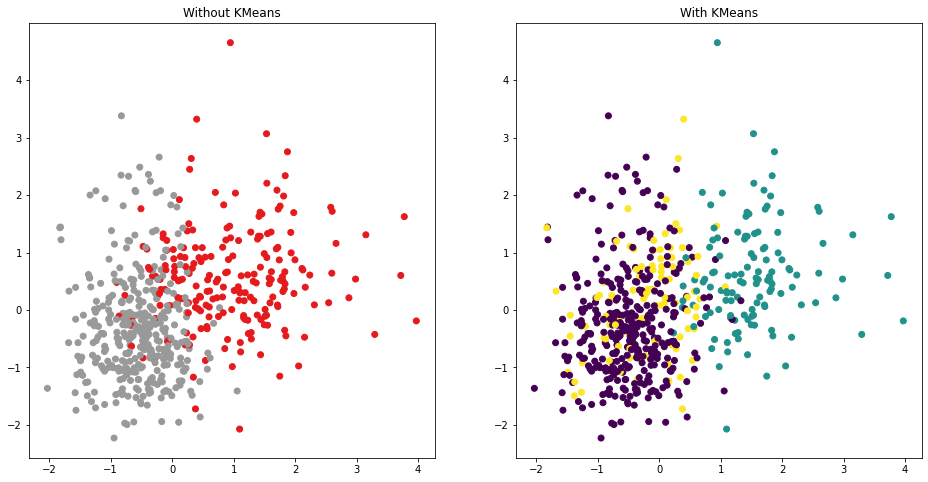

In [13]:
x1 = scaled_data[:,0]
y1 = scaled_data[:,1]
x2 = scaled_data[:,0]
y2 = scaled_data[:,1]
fig, ax = plt.subplots(1, 2, figsize=(16,8))
ax[0].scatter(x2, y2, c=df['target'], cmap=plt.cm.Set1)
ax[1].scatter(x1, y1, c=labels)
ax[0].set_title('Without KMeans')
ax[1].set_title('With KMeans')

We can se that we've got a few more overlapping datapoints without KMeans

Plotting with UMAP

In [14]:
umap = UMAP()
umap_fitted = umap.fit_transform(scaled_data)

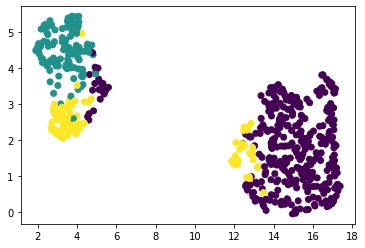

In [15]:
plt.scatter(umap_fitted[:,0], umap_fitted[:,1], c=labels)
plt.show()

PCA - optimising our data.
Starting with 31 components as it is the number of dimension in the dataframe (569, 31)

In [14]:
pca_full_df = PCA(n_components=31)
pca_full_df.fit(scaled_data)

PCA(n_components=31)

Reviewing the variance ratio for our components in order to chose the best number.

In [45]:
fig = px.line(np.cumsum(pca_full_df.explained_variance_ratio_))
fig.show()

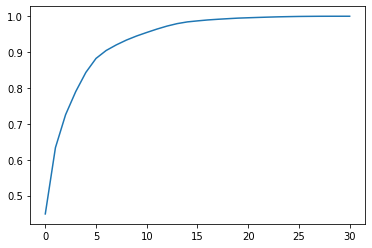

In [15]:
plt.plot(np.cumsum(pca_full_df.explained_variance_ratio_))
plt.show()

In [16]:
#Between 10-15 seems good so checking the variance
print(np.cumsum(pca_full_df.explained_variance_ratio_)[9])
print(np.cumsum(pca_full_df.explained_variance_ratio_)[14])

0.9449446865634289
0.9842254412869369


PCA using 15 components

In [17]:
pca = PCA(n_components=15)
pca_data = pca.fit_transform(scaled_data)

In [18]:
model = KMeans(n_clusters=3)
model.fit(pca_data)
pca_labels = model.predict(pca_data)

Plotting initial data, KMeans and KMeans after PCA

Text(0.5, 1.0, 'PCA KMeans')

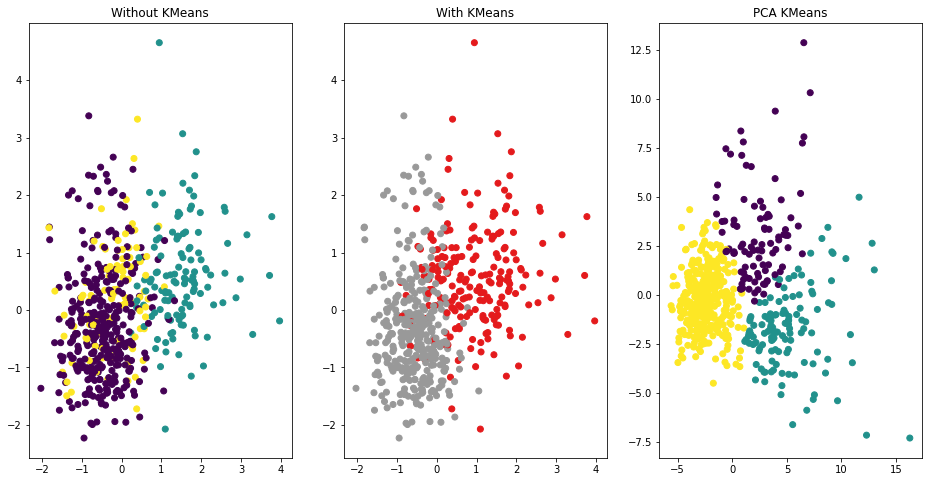

In [19]:
x1 = scaled_data[:,0]
y1 = scaled_data[:,1]
x2 = scaled_data[:,0]
y2 = scaled_data[:,1]
x3 = pca_data[:,0]
y3 = pca_data[:,1]
fig, ax = plt.subplots(1, 3, figsize=(16,8))
ax[0].scatter(x1, y1, c=labels)
ax[1].scatter(x2, y2, c=df['target'], cmap=plt.cm.Set1)
ax[2].scatter(x3, y3, c=pca_labels)
ax[0].set_title('Without KMeans')
ax[1].set_title('With KMeans')
ax[2].set_title('PCA KMeans')

Plotting PCA KMeans with UMAP

In [21]:
umap_pca = UMAP(random_state=0)
umap_pca_fitted = umap.fit_transform(pca_data)

In [24]:
fig = px.scatter(umap_pca_fitted, x=0, y=1, color=labels, title='Test')
fig.show()

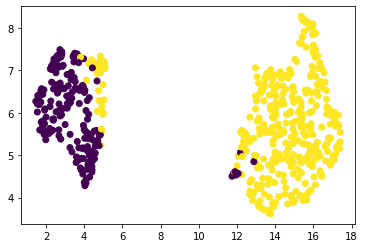

In [21]:
plt.scatter(umap_pca_fitted[:,0], umap_pca_fitted[:,1], c=labels)
plt.show()

In [26]:
umap_2d = UMAP(n_components=2, init='random', random_state=0)
umap_3d = UMAP(n_components=3, init='random', random_state=0)

In [27]:
proj_2d = umap_2d.fit_transform(scaled_data)
proj_3d = umap_3d.fit_transform(scaled_data)

In [28]:
fig_2d = px.scatter(proj_2d, x=0, y=1, color=labels)
fig_2d.show()

Final thoughts on PCA vs non-PCA:
Looking at our plots we can see that PCA helped KMeans eliminate overlapping datapoints.
In UMAP we can also see that PCA helped tighten up our clusters.